In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
path_folder = (os.path.abspath(os.path.join((os.path.abspath(os.path.join(os.getcwd(), os.pardir))),os.pardir)))

google_colab = 0
if google_colab == 1:
    from google.colab import drive
    drive.mount('/content/drive/')
    path_folder = "/content/drive/MyDrive/dsprojects/dsproject_grev/"
    
sys.path.insert(0, path_folder+"/src/"#+features/"
                )
import util

import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = stopwords.words('english')

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans


In [3]:
import os
import pickle
import sys
path_folder = "../../"
sys.path.insert(0, path_folder)
import src.util as util

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import src.data.etl as etl
import src.data.build_tfidf as build_tfidf
import src.data.build_word2vec as build_word2vec
import src.features.data_preparation_interaction as dpi
import src.models.model_interaction as mi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'features.data_preparation_interaction.Temp_Interaction_Data_Preparation_Builder'>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
with open("../../configs.json", "rb") as f:
    configs = json.load(f)

In [7]:
recipe_word2vec = build_word2vec.main(configs=configs, method="load")

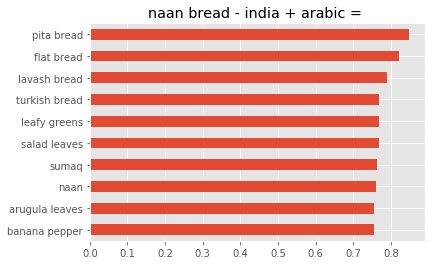

In [8]:
util.word2vec_arithmetic(recipe_word2vec, "india","naan bread","arabic" )

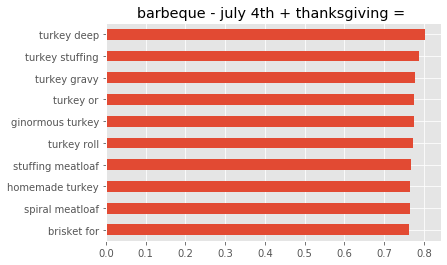

In [9]:
util.word2vec_arithmetic(recipe_word2vec, "july 4th", "barbeque", "thanksgiving")

In [ ]:
util.

In [10]:
recipe_tfidf = build_tfidf.main(configs=configs, method="load")

In [11]:
reviews_dataset_reader = util.Reviews_Dataset_Reader(configs)
reviews_df = reviews_dataset_reader.build_reviews_df()
stop_words = stopwords.words('english')
lexicon = [word for word in recipe_tfidf.vocab2idx if word not in stop_words]

1it [00:09,  9.38s/it]
100%|████████████████████████████████████████████████████████████████████████| 11015/11015 [00:00<00:00, 604818.34it/s]


In [12]:
word2vec_dataset_reader = util.Word2vec_Dataset_Reader(recipe_word2vec,lexicon,configs,)

In [13]:
word2vec_df = word2vec_dataset_reader.build_word2vec_df()

In [14]:
temp_interaction_data_preparation_builder = dpi.Temp_Interaction_Data_Preparation_Builder(recipe_tfidf,word2vec_df,configs,)

In [15]:
temp_interaction_data_preparation_builder.set_up(reviews_df)

../..\src\features\data_preparation_interaction.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["review_text"] = util.clean_text_column(review_df["review_text"]).str.split(" ")


Exploded review_text
Filtered exploded review_text
temp_id_removal
Removed double singletons
aggregation_averages
Aggregation for users, businesses


../..\src\features\data_preparation_interaction.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df[temp_id_version + "_vec"] /= agg_df[temp_id_version + "_word_count"]
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Division (with curr)
Fabricating negative samples


In [16]:
business_embeddings = temp_interaction_data_preparation_builder.business2vec_df["business_vec"]
user_embeddings = temp_interaction_data_preparation_builder.user2vec_df["user_vec"]

business_embeddings_ = np.array(business_embeddings.apply(list).tolist())
user_embeddings_ = np.array(user_embeddings.apply(list).tolist())

In [19]:
pca = PCA(50)
tsne = TSNE(n_components=2, perplexity=100, n_iter=250,verbose=True)
Z_business = business_embeddings_
Z_business = pca.fit_transform(Z_business)
Z_business = tsne.fit_transform(Z_business)
#Z_business = umap0.fit_transform(Z_business)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 30588 samples in 0.000s...
[t-SNE] Computed neighbors for 30588 samples in 25.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30588
[t-SNE] Computed conditional probabilities for sample 2000 / 30588
[t-SNE] Computed conditional probabilities for sample 3000 / 30588
[t-SNE] Computed conditional probabilities for sample 4000 / 30588
[t-SNE] Computed conditional probabilities for sample 5000 / 30588
[t-SNE] Computed conditional probabilities for sample 6000 / 30588
[t-SNE] Computed conditional probabilities for sample 7000 / 30588
[t-SNE] Computed conditional probabilities for sample 8000 / 30588
[t-SNE] Computed conditional probabilities for sample 9000 / 30588
[t-SNE] Computed conditional probabilities for sample 10000 / 30588
[t-SNE] Computed conditional probabilities for sample 11000 / 30588
[t-SNE] Computed conditional probabilities for sample 12000 / 30588
[t-SNE] Computed conditional probabilities for s

In [20]:
pca = PCA(50)
tsne = TSNE(n_components=2, perplexity=100, n_iter=250,verbose=True)
Z_user = user_embeddings_
Z_user = pca.fit_transform(Z_user)
Z_user = tsne.fit_transform(Z_user)
#Z_user = umap0.fit_transform(Z_user)


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 36911 samples in 0.016s...
[t-SNE] Computed neighbors for 36911 samples in 37.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 36911
[t-SNE] Computed conditional probabilities for sample 2000 / 36911
[t-SNE] Computed conditional probabilities for sample 3000 / 36911
[t-SNE] Computed conditional probabilities for sample 4000 / 36911
[t-SNE] Computed conditional probabilities for sample 5000 / 36911
[t-SNE] Computed conditional probabilities for sample 6000 / 36911
[t-SNE] Computed conditional probabilities for sample 7000 / 36911
[t-SNE] Computed conditional probabilities for sample 8000 / 36911
[t-SNE] Computed conditional probabilities for sample 9000 / 36911
[t-SNE] Computed conditional probabilities for sample 10000 / 36911
[t-SNE] Computed conditional probabilities for sample 11000 / 36911
[t-SNE] Computed conditional probabilities for sample 12000 / 36911
[t-SNE] Computed conditional probabilities for s

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(10)
kmeans.fit(business_embeddings_)
business_labels = kmeans.labels_
print(len((business_labels)))
print(len(set(business_labels)))

30588
10


In [22]:
kmeans = KMeans(20)
kmeans.fit(user_embeddings_)
user_labels = kmeans.labels_
print(len((user_labels)))
print(len(set(user_labels)))

36911
20


Text(0.5, 1.0, 'User TSNE Embeddings')

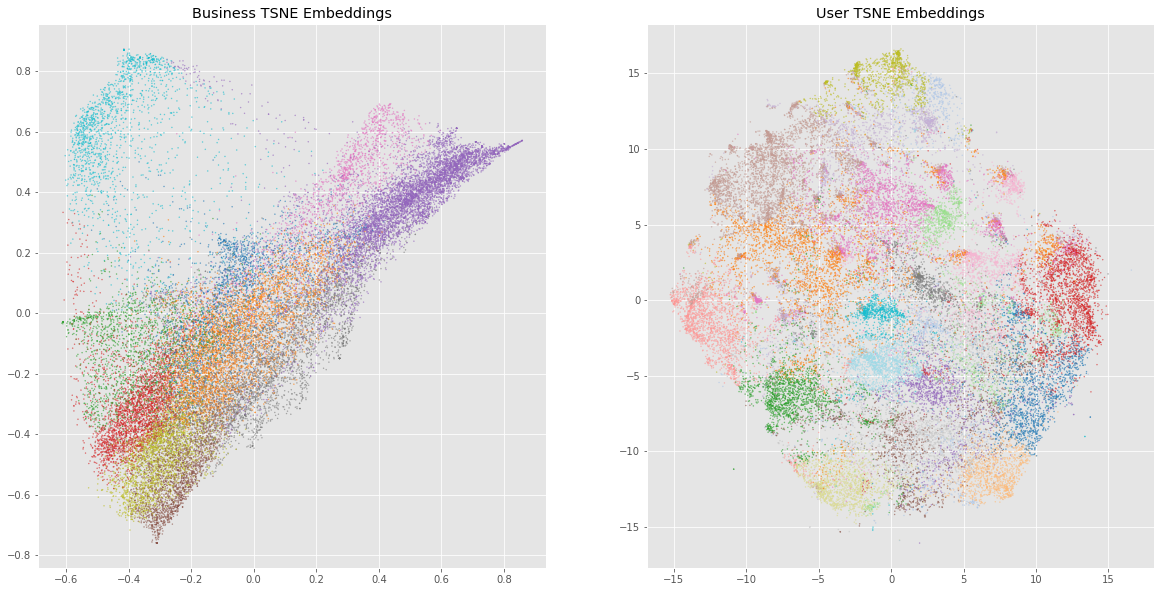

In [23]:

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].scatter(Z_business[:,0], Z_business[:,1], alpha=0.5,s=1, c=business_labels,cmap="tab10")
axs[0].set_title("Business TSNE Embeddings")
#from matplotlib import cm
#colormap = cm.hsv(range(20))


axs[1].scatter(Z_user[:,0], Z_user[:,1], alpha=0.5,s=1, c=user_labels,cmap="tab20")#, label=word_labels)
axs[1].set_title("User TSNE Embeddings")
#axs[1].legend()

* **On the left plot**:
    * Each point is a restaurant
    * The colors represent automatically-calculated restaurant "groups" (grouped based on the textual analysis of the reviews they get)
* **On the right plot**:
    * Each point is a reviewer / user
    * The colors represent automatically-calculated customer "groups" (grouped based on the textual analysis of the restaurants they visit)

In [24]:
business2vec_df = temp_interaction_data_preparation_builder.business2vec_df
user2vec_df = temp_interaction_data_preparation_builder.user2vec_df
id2review2word_df = temp_interaction_data_preparation_builder.id2review2word_df

In [25]:
business2vec_df["group"] = business_labels
user2vec_df["group"] = user_labels

In [26]:
business2word2label_df = (id2review2word_df.merge(business2vec_df, on=["business_id"])[["business_id","review_text","group"]])
user2word2label_df = (id2review2word_df.merge(user2vec_df, on=["user_id"])[["user_id","review_text","group"]])

In [27]:
business2review2label_df = business2word2label_df.groupby(["business_id"],as_index=False).agg({"review_text":list,
                                                                                               "group":np.mean})
business2review2label_df["review_text"] = business2review2label_df["review_text"].apply(lambda x: " ".join(x))
business2review2label_df["group"] = business2review2label_df["group"].astype(int)

user2review2label_df = user2word2label_df.groupby(["user_id"],as_index=False).agg({"review_text":list,
                                                                                   "group":np.mean})
user2review2label_df["review_text"] = user2review2label_df["review_text"].apply(lambda x:" ".join(x))
user2review2label_df["group"] = user2review2label_df["group"].astype(int)


In [29]:
vectorizer = Pipeline([('count', CountVectorizer(
    stop_words=stop_words,
    vocabulary=temp_interaction_data_preparation_builder.recipe_tfidf.vocab2idx,
)),
                       ('tfidf', TfidfTransformer())])
temp_recipe_vectorizer_builder = util.Temp_Recipe_Vectorizer_Builder(vectorizer=vectorizer,
                                                                food_vocab_column=None)

In [30]:
tfidf_group_collapser_business = util.Tfidf_Group_Collapser(
    business2review2label_df,
    "group",
    "review_text",
    temp_recipe_vectorizer_builder
)
tfidf_group_collapser_business.collapse_by_strjoin()
business_word2label_df = tfidf_group_collapser_business.build_temp_word2label_df()


100%|██████████████████████████████████████████████████████████████████████████| 1796/1796 [00:00<00:00, 356387.85it/s]


In [35]:
(
    business_word2label_df
    .sort_values(["stdev"],ascending=False).head(500)
    .groupby(["arg_label"],as_index=False).agg({"word": list})#["word"].apply(list)
).rename(columns={"arg_label":"Restaurant Type", "word":"Most Identifiable Keywords"})

,Restaurant Type,Most Identifiable Keywords
0,0,"[burger, fries, burgers, meat, taco, hot, dog,..."
1,1,"[crab, sauce, fresh, lobster, sandwich, pasta,..."
2,2,"[good, sushi, great, food, best, roll, tasty, ..."
3,3,"[fried, rice, pork, beef, spicy, noodles, bris..."
4,4,"[salad, soup, potato, dressing, bar, caesar, g..."
5,5,"[cheese, bacon, eggs, toast, mac, french, bage..."
6,6,"[chicken, waffles, wings, tenders, naan, buffa..."
7,7,"[chocolate, cake, cream, pancakes, delicious, ..."
8,8,"[shrimp, ramen, fish, steak, seafood, oysters,..."
9,9,"[pizza, crust, slice, pepperoni, thin, topping..."


* **This shows the restaurant types that the code artificially grouped together, as colored in the scatterplot from earlier, and the most distinct words of each type**
* Thus, some inferences can be made:
    * Restaurants of Group 7 appear to uniquely serve desserts
    * Restaurants of Group 8 appear to uniquely serve seafood
    * Restaurants of Group 9 appear to uniquely serve pizza
    * Restaurants of Group 4 appear to uniquely serve salads

In [36]:
tfidf_group_collapser_user = util.Tfidf_Group_Collapser(
    user2review2label_df,
    "group",
    "review_text",
    temp_recipe_vectorizer_builder
)
tfidf_group_collapser_user.collapse_by_strjoin()
user_word2label_df = tfidf_group_collapser_user.build_temp_word2label_df()

100%|██████████████████████████████████████████████████████████████████████████████████████| 1870/1870 [00:00<?, ?it/s]


In [38]:
(
    user_word2label_df
    .sort_values(["stdev"],ascending=False).head(500)
    .groupby(["arg_label"],as_index=False).agg({"word": list})#["word"].apply(list)
).rename(columns={"arg_label":"Reviewer Type", "word":"Most Identifiable Keywords"})

,Reviewer Type,Most Identifiable Keywords
0,0,"[chicken, waffles, wings, tenders, naan, south..."
1,1,"[fish, fresh, seafood, ramen, oysters, lobster..."
2,2,"[dessert, pie, hot, coconut, vanilla, top, sof..."
3,3,"[good, great, best, food, sushi, time, beer, r..."
4,4,"[burger, burgers, one, style, favorite, dog, s..."
5,5,"[chocolate, cake, cookies, cheesecake, cookie,..."
6,6,"[shrimp, crab, salmon, grits, scallops, stuffe..."
7,7,"[pizza, crust, slice, thin, pepperoni, topping..."
8,8,"[sandwich, made, bit, way, small, cut, right, ..."
9,9,"[pork, beef, steak, ribs, brisket, meat, bbq, ..."


* **This shows the Customer/Reviewer types that the code artificially grouped together, as colored in the scatterplot from earlier, and the most distinct words of each type**
* Thus, some inferences can be made:
    * Customers of Group 14 appear to uniquely enjoy soups
    * Customers of Group 17 appear to uniquely enjoy Mediterranean and Greek Food
    * Customers of Group 7 appear to uniquely enjoy pizza
    * Customers of Group 1 and Group 6 appear to enjoy seafood
    * Customers of Group 2 and Group 19 appear to enjoy desserts


## Thus, we have a way to recommend Customers to Restaurants

* Customer-Group 1 and Customer-Group 6 (seafood lovers), should be recommended Restaurant-Group 8 (seafood restaurants)
* Customer-Group 7 (pizza lovers), should be recommended Restaurant-Group 9 (pizza restaurants)
* Customer-Group 2 and Customer-Group 19 (dessert lovers), should be recommended Restaurant-Group 7
* ***And so on***

Text(0.5, 1.0, 'User TSNE Embeddings')

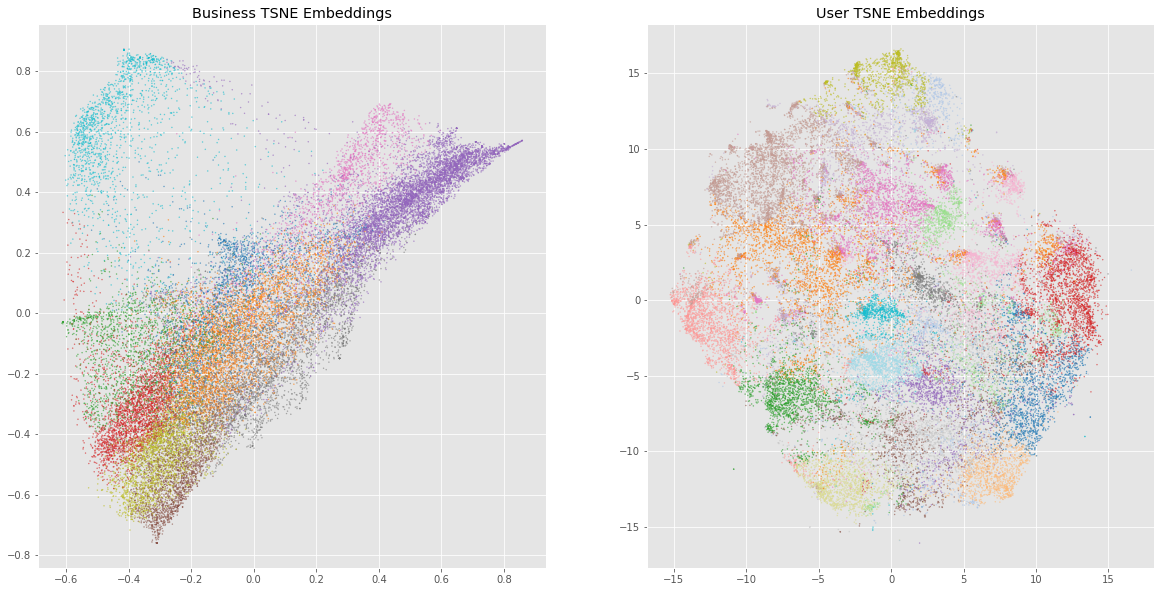

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].scatter(Z_business[:,0], Z_business[:,1], alpha=0.5,s=1, c=business_labels,cmap="tab10")
axs[0].set_title("Business TSNE Embeddings")
#from matplotlib import cm
#colormap = cm.hsv(range(20))


axs[1].scatter(Z_user[:,0], Z_user[:,1], alpha=0.5,s=1, c=user_labels,cmap="tab20")#, label=word_labels)
axs[1].set_title("User TSNE Embeddings")
#axs[1].legend()

* The next plan would be to cluster further (The scatterplots are plotted again for convenience). The results seen so far are just a demo. Instead of just choosing N=20 for the amount of customer groups, it should be higher to have more intricate segmentation of the demographics.

* Noticeably, there are a lot more intricate "subgroups" with the customer scatterplot (right), which makes sense: individuals tend to have more variability, while restaurants are businesses that must adhere their menus to a corporate theme or branding.

* Clearly 20 is too small of a number of subgroups to divide the customers into. Maybe a higher number like 500 would capture more nuance: (for example) customer-group 235 are "people who like mediterranean food, hate spicy food, and are neutral about seafood", or customer-group 441 are "people who like fast food, Asian food, " (etc.)


#### **Approaches after Clustering**

* More approaches can be utilized after managing to cluster further
    * Bayesian Personalized Ranking
    * Matrix Factorization (e.g. Latent Factor Models & SVD)